# Cooperative Coevolution of Predator Robots based on BSO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from optim.BSO.bso import bso
from prey.prey import smartLinear
from visual.visual import Plot

## Define Testing Grid and Robots

In [2]:
grid = 30
Ns = 8
Np = 10
p_robots = np.random.randint(0, grid, (Ns, Np, 2))
prey = np.random.randint(0, grid, 2)

## BSO Iteration

[25  1]
[23  0]
[24  1]
[22  0]
[23  1]
[21  0]
[22  1]
[20  0]
[21  1]
[19  0]
[20  1]
[18  0]
[19  1]
[17  0]
[18  1]
[16  0]
[17  1]
[15  0]
[16  1]
[14  0]
[15  1]
[13  0]
[14  1]
[12  0]
[13  1]
[11  0]
[12  1]
[10  0]
[11  1]
[9 0]
[10  1]
[8 0]
[9 1]
[7 0]
[8 1]
[6 0]
[7 1]
[5 0]
[6 1]
[4 0]
[5 1]
[3 0]
[4 1]
[2 0]
[3 1]
[1 0]
[2 1]
[0 0]
[1 1]
[0 1]
[1 2]
[0 2]
[1 3]
[0 3]
[1 4]
[0 4]
[1 5]
[0 5]
[1 6]
[0 6]
[1 7]
[0 7]
[1 8]
[0 8]
[1 9]
[0 9]
[ 1 10]
[ 0 10]
[ 1 11]
[ 0 11]
[ 1 12]
[ 0 12]
[ 1 13]
[ 0 13]
[ 1 14]
[ 0 14]
[ 1 15]
[ 0 15]
[ 1 16]
[ 0 16]
[ 1 17]
[ 0 17]
[ 1 18]
[ 0 18]
[ 1 19]
[ 0 19]
[ 1 20]
[ 0 20]
[ 1 21]
[ 0 21]
[ 1 22]
[ 0 22]
[ 1 23]
[ 0 23]
[ 1 24]
[ 0 24]
[ 1 25]
[ 0 25]
[ 1 26]
[ 0 26]
[ 1 27]
[ 0 27]
[ 1 28]
[ 0 28]
[ 1 29]
[ 0 29]
[ 1 30]
[ 0 30]
[ 1 30]
[ 1 29]
[ 2 29]
[ 2 28]
[ 3 28]
[ 3 27]
[ 1 27]
[ 3 27]
[ 4 27]
[ 4 26]
[ 2 26]
[ 4 26]
[ 5 26]
[ 5 25]
[ 3 25]
[ 5 25]
[ 6 25]
[ 6 24]
[ 4 24]
[ 6 24]
[ 7 24]
[ 7 23]
[ 5 23]
[ 7 23]
[ 8 23]
[ 8 22]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

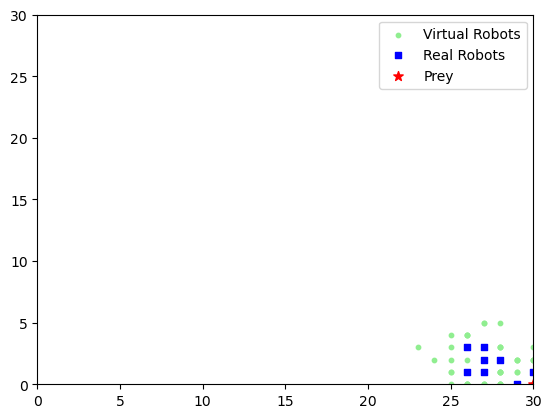

In [ ]:
T = 100
plotter = Plot(grid)
for t in range(T):
    prey = smartLinear(p_robots[:, 0], prey, grid)
    if prey is None:
        break
    bso(p_robots, prey, grid)
    plotter.update(p_robots, prey)
if prey is None:
    print(f'BSO caputured with {plotter.cnt} steps')
else:
    print(f'Failed to capture within {plotter.cnt} steps')
plotter.save()